In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt, triang
import gitInformation

In [4]:
%matplotlib inline

In [10]:
tri = triang(11)
x = np.zeros(67)
data = np.append(tri,x)
data = np.append(x,data)
diff_noise = np.zeros((140,len(data)))
noised_data = np.zeros((140,len(data)))
medfilter = np.zeros((140,len(data)))
filtered_data = np.zeros((140,len(data)))
behav = np.zeros(140)
wl = [3, 5, 7, 11, 15, 19, 23, 25, 27]
stdsn = [0.33333333, 0.25, 0.2, 0.1666667, 0.142857, 0.125, 0.11111111, 0.1]

In [13]:
values = np.zeros((len(wl), len(stdsn)))
count = -1
count2 = -1
for s in stdsn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, s, len(data))
            noised_data[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_data[i, :], w)
            filtered_data[i, :] = noised_data[i, :] - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_data[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("valuesspikes2.txt", values)

In [16]:
viridis_data = np.loadtxt("viridis_data.txt")

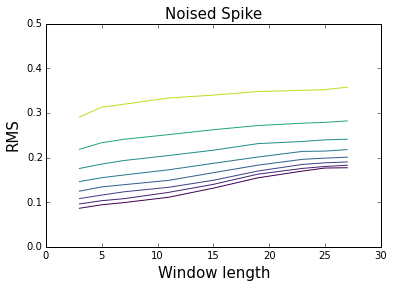

In [19]:
plt.figure()
for i in range (8):
    plt.axis([0, max(wl) + 3, 0, .5])
    plt.title("Noised Spike", size = 15) 
    plt.xlabel('Window length', fontsize = 15)
    plt.ylabel('RMS', fontsize = 15)
    plt.plot(wl,values[:,i], color=viridis_data[((i)*25)-25,:])
    plt.plot(np.std(data))
plt.savefig('Behavior given noise different wl spike.png', dpi = 600)